In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest,chi2

Reading csv file

In [27]:
df=pd.read_csv('taskdata.csv')

In [28]:
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [29]:
X=df.drop('target',axis=1)
Y=df['target']

In [30]:
X.fillna(X.mean(), inplace=True)


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sv=StandardScaler()

In [34]:
data=sv.fit_transform(X)

# #creating new features

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca=PCA(n_components=2)

In [37]:
z=pca.fit_transform(data)

In [38]:
z.shape

(4407, 2)

In [39]:
dz=pd.DataFrame(z)

# Features are feature2 and feature1

In [40]:
dz.columns=['feature1','feature2']

In [41]:
dz.head()

,feature1,feature2
0,0.245499,-0.202497
1,0.053381,0.324921
2,0.163518,0.323130
3,2.035862,-0.738942
4,0.400467,0.260871


In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
X=X.values
Y=Y.values

# data visualization 

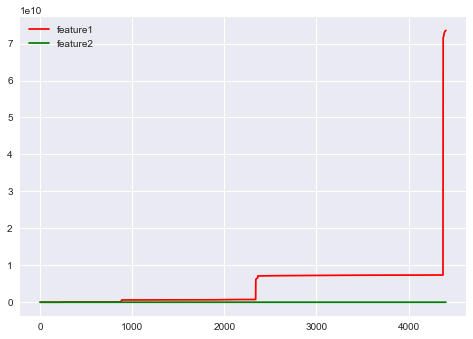

In [65]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.plot(X[:,0],color="red",label="feature1")
plt.plot(X[:,1],color="green",label="feature2")
plt.legend()
plt.show()

In [45]:
split=int(0.8*X.shape[0])

X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

In [46]:
print(X_train.shape,Y_train.shape)

(3525, 16) (3525,)


In [47]:
print(X_test.shape,Y_test.shape)

(882, 16) (882,)


# Classification

In [48]:
classification=LogisticRegression()

In [49]:
classification.fit(X_train,Y_train)

LogisticRegression()

In [53]:
print("Accuracy is: ",np.sum(classification.predict(X_test)==Y_test)/Y_test.shape[0])

Accuracy is:  0.828798185941043
